**1.Intro & Data Recap**
I used global unemployment dataset that covers unemployment data from many countries between 2014 and 2014 ,the dataset includes information like age groups and gender (male and female), with each country the dataset is balanced

While exploring the data (EDA) I noticed a few issues that need to be fixed before doing any modeling:

missing values:some of the unemployment rates for certain years were missing espcially the lasr 4 years

Outliers:I found some unusual spikes, especially around 2020–2022, which likely happened due to the COVID-19 pandemic affecting jobs globally

Skewed Features:Some of the numerical data are right-skewed which make it not evenly spread out so the distibution is a bit off from normal

**Missing Values:**

In [4]:
#Missing Values:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pt = pd.read_csv(r"C:\Users\rahma\Downloads\global_unemployment_data.csv")
pt.isnull().sum()

country_name       0
indicator_name     0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               6
2023              12
2024              12
dtype: int64

In [5]:
# Handle using kNN imputation since unemployment rate can be affected by some factors like age gender etc 
#so i thought its better to use kNN because kNN considers these similarities when filling in missing values 
#making the imputation more context-aware and accurate compared to just using a simple average or median
from sklearn.impute import KNNImputer
import pandas as pd
num_data = pt.select_dtypes(include=['number'])
imputer = KNNImputer(n_neighbors=4, weights='distance')
num_imputed = imputer.fit_transform(num_data)
pt[num_data.columns] = num_imputed
print(pt.isnull().sum())

country_name      0
indicator_name    0
sex               0
age_group         0
age_categories    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
2024              0
dtype: int64


**Noise Reduction:**

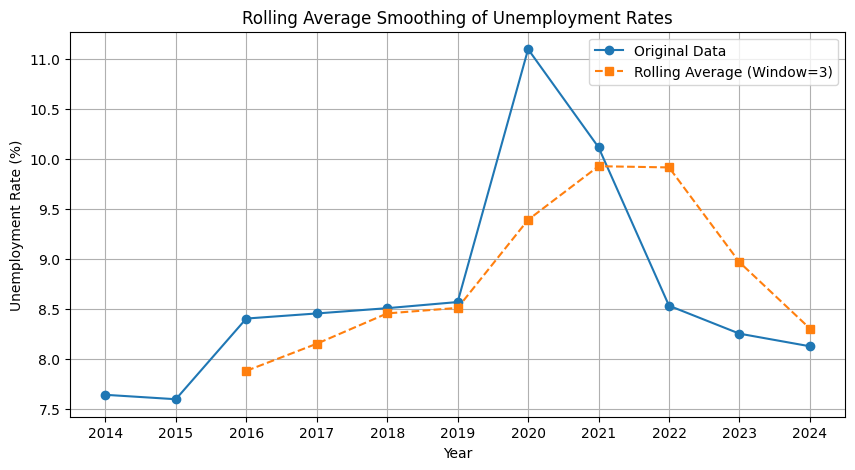

In [44]:
country_data=pt[pt['country_name']=='Kuwait']
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
unemployment=country_data[years].mean()
rolling_avg=unemployment.rolling(window=3).mean()
plt.figure(figsize=(10,5))
plt.plot(years,unemployment,label='Original Data',marker='o')
plt.plot(years, rolling_avg, label='Rolling Average (Window=3)',marker='s',linestyle='--')
plt.title("Rolling Average Smoothing of Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

I used the rolling average to see the unemployment rate throught the years in kuwait
because it helps smooth out small changes in the data and makes
the trend easier to see
it removes some noise so I can focus on how unemployment changes over time more clearly

**Outlier Detection**

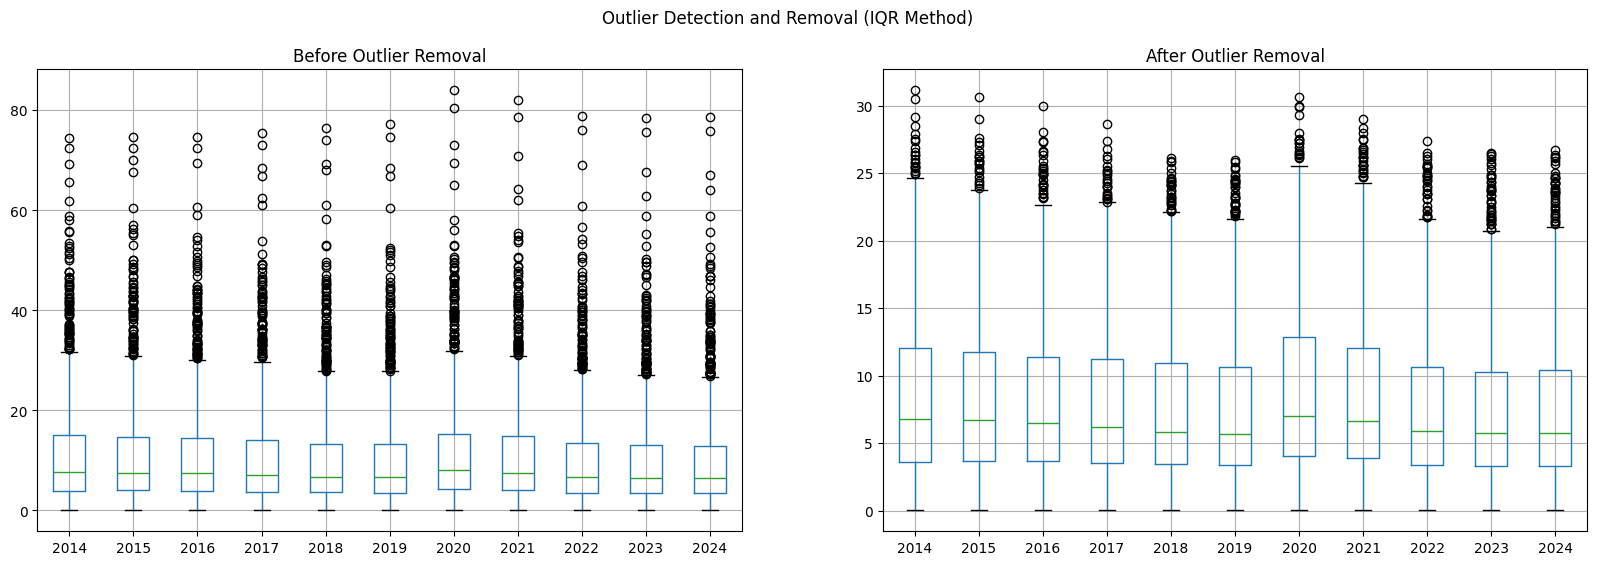

Original shape: (1134, 16)
After removal: (1015, 16)


In [12]:
#Outlier Detection
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
Q1=pt[years].quantile(0.25)
Q3= pt[years].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
pt2=pt.copy()
for i in years:
    pt2=pt2[(pt2[i]>lower_limit[i])&(pt2[i]<upper_limit[i])]
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
pt[years].boxplot()
plt.title("Before Outlier Removal")
plt.subplot(1,2,2)
pt2[years].boxplot()
plt.title("After Outlier Removal")
plt.suptitle("Outlier Detection and Removal (IQR Method)")
plt.show()
print("Original shape:", pt.shape)
print("After removal:", pt2.shape)

z-score usually deals with normal distrbuted dataset but my dataset is right-skewed and IQR works better for skewed data thats why i choose IQR as a Outlier Detection

**Inconsistencies** 

In [50]:
print(pt['country_name'].unique())
print(pt['sex'].unique())
print(pt['age_group'].unique())
print(pt['age_categories'].unique())
pt[['age_group', 'age_categories']].drop_duplicates()

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Channel Islands' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo' 'Congo, Democratic Republic of the'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Ivory Coast' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran, Islamic Republic of' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan

,age_group,age_categories
0,15-24,Youth
1,25+,Adults
2,Under 15,Children


No text inconsistencies foundso i don’t need text cleaning for this dataset

**Data Integration**

In [14]:
#since im only dealing with one dataset i can't apply  Data Integration

**Data Reduction**

In [67]:
sample=pt2.sample(frac=0.2,random_state=42)
print("Original data :",pt2.shape)
print("Sampled data shape:",sample.shape)
sample.drop(columns=['age_group'],inplace=True) 
print("Removed redundant column: 'age_group'")
corr=pt.select_dtypes(include=['number']).corr().abs()
to_drop = [i for i in corr.columns if any(corr[i]>0.98)]
to_drop.remove('2014') #when the result appeard it removed all the years cols with the rate of unemployment
#i thought its better to leave one col so you can see some rates 
sample.drop(columns=to_drop,inplace=True)
print("Removed highly correlated columns:",list(to_drop))
print("\nFinal dataset shape after reduction:",sample.shape)


Original data : (1015, 16)
Sampled data shape: (203, 16)
Removed redundant column: 'age_group'
Removed highly correlated columns: ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

Final dataset shape after reduction: (203, 5)


The original dataset had 1015 rows and 16 columns  after removing outliers and after sampling it was reduced to 203 rows one redundant column ('age_group') and several highly correlated year columns (2015–2024) were removed the final dataset has 5 columns and 203 rows these columns likely had very similar unemployment values

**Data Transformation**

**Scaling**

**scaling for cleaned dataset without sampling and reduction**

Scaled 11 numerical columns


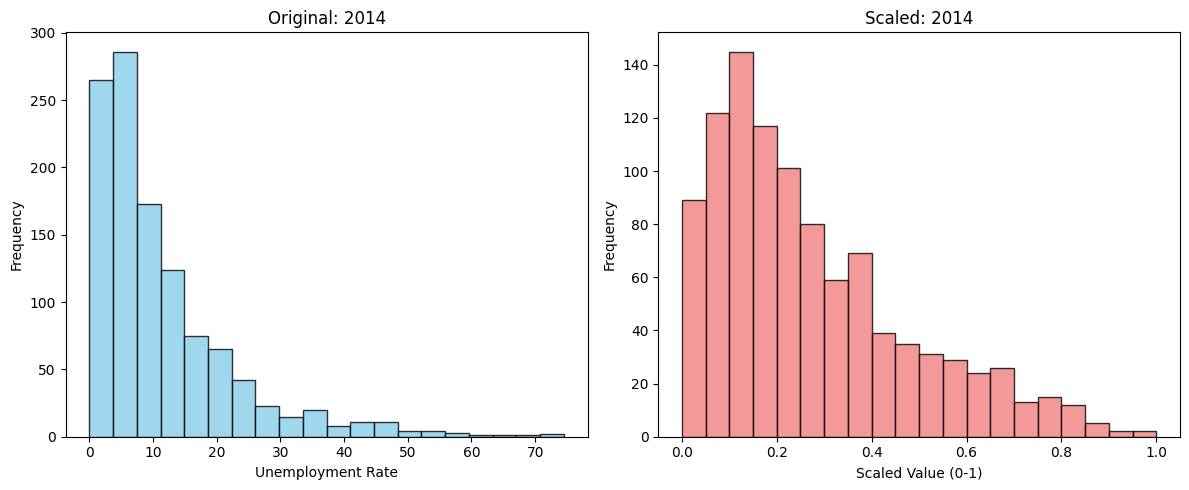


2014 Statistics:
Original → Min: 0.027, Max: 74.485, Mean: 11.388
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.273
------------------------------------------


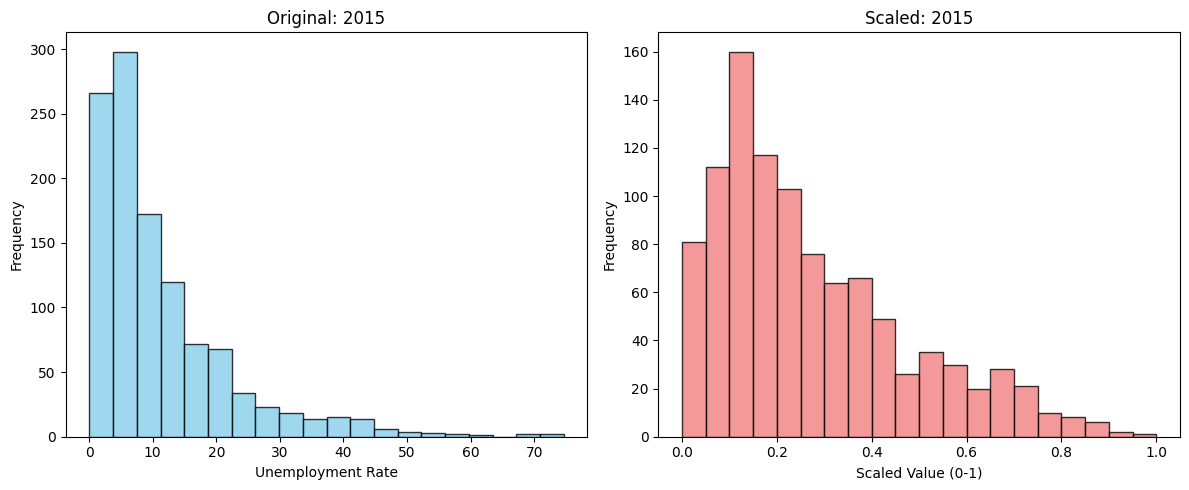


2015 Statistics:
Original → Min: 0.034, Max: 74.655, Mean: 11.272
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.274
------------------------------------------


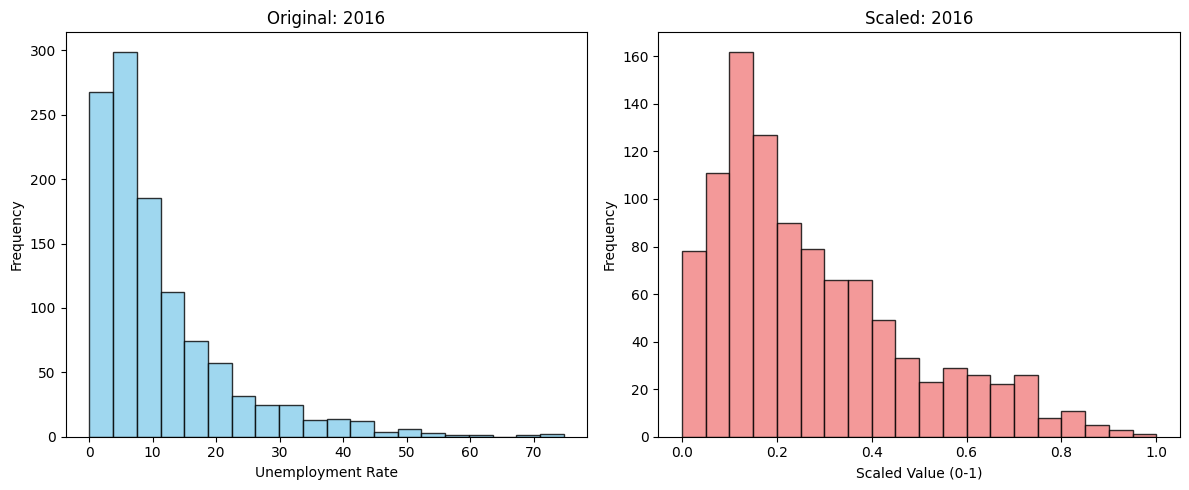


2016 Statistics:
Original → Min: 0.038, Max: 74.720, Mean: 11.123
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.275
------------------------------------------


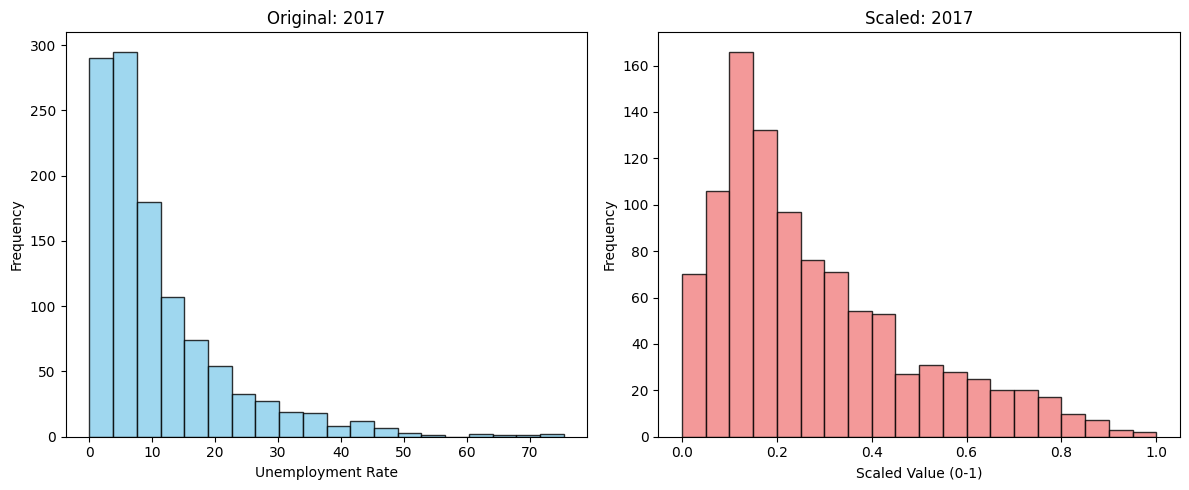


2017 Statistics:
Original → Min: 0.035, Max: 75.416, Mean: 10.864
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.280
------------------------------------------


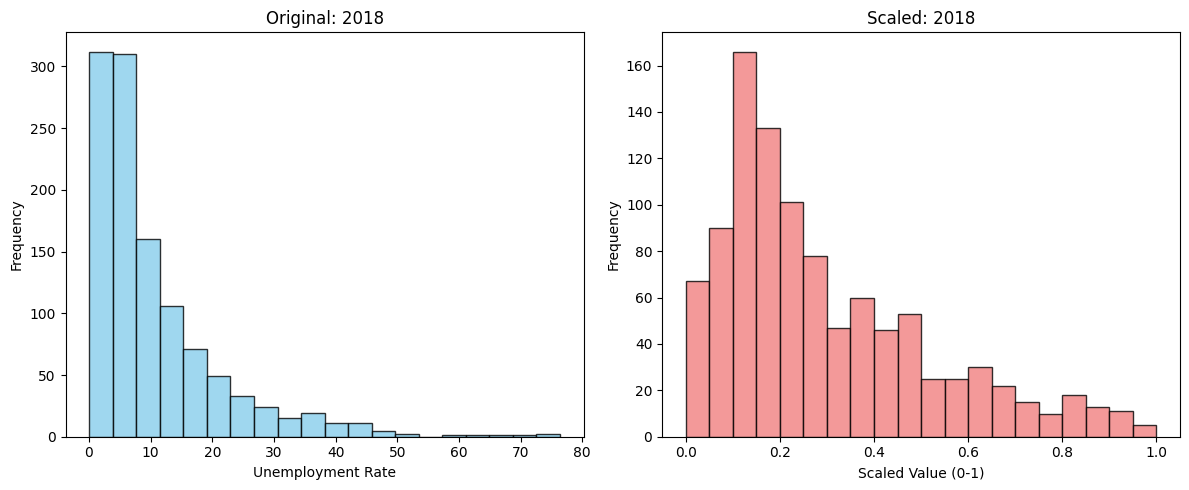


2018 Statistics:
Original → Min: 0.044, Max: 76.395, Mean: 10.516
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.295
------------------------------------------


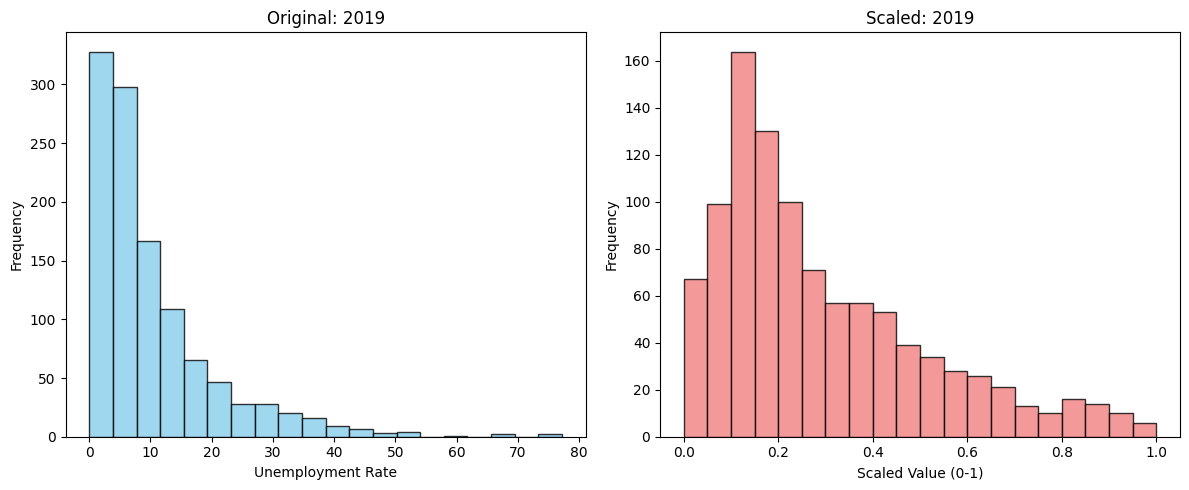


2019 Statistics:
Original → Min: 0.036, Max: 77.173, Mean: 10.311
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.292
------------------------------------------


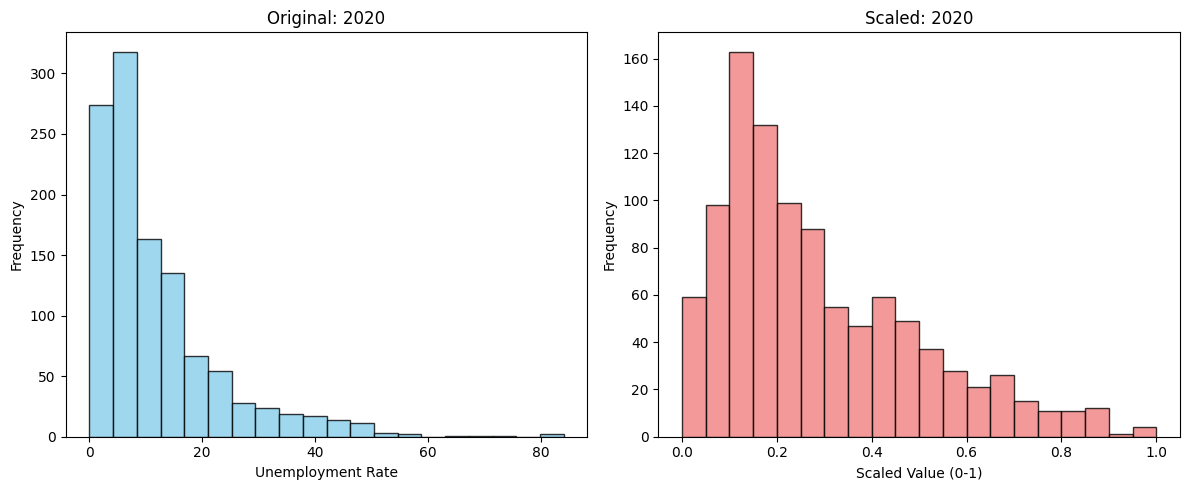


2020 Statistics:
Original → Min: 0.056, Max: 83.990, Mean: 11.851
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.289
------------------------------------------


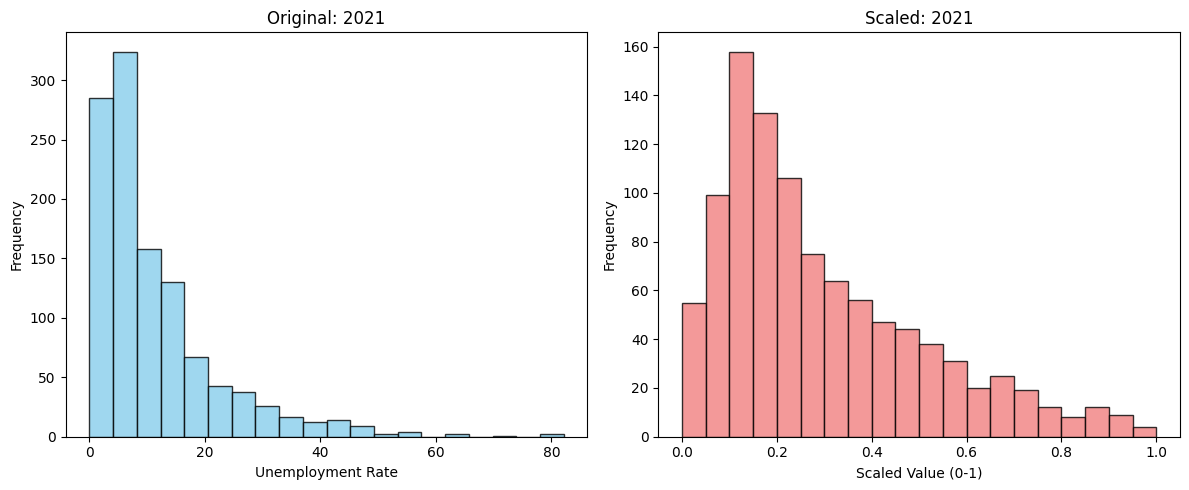


2021 Statistics:
Original → Min: 0.064, Max: 82.135, Mean: 11.423
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.294
------------------------------------------


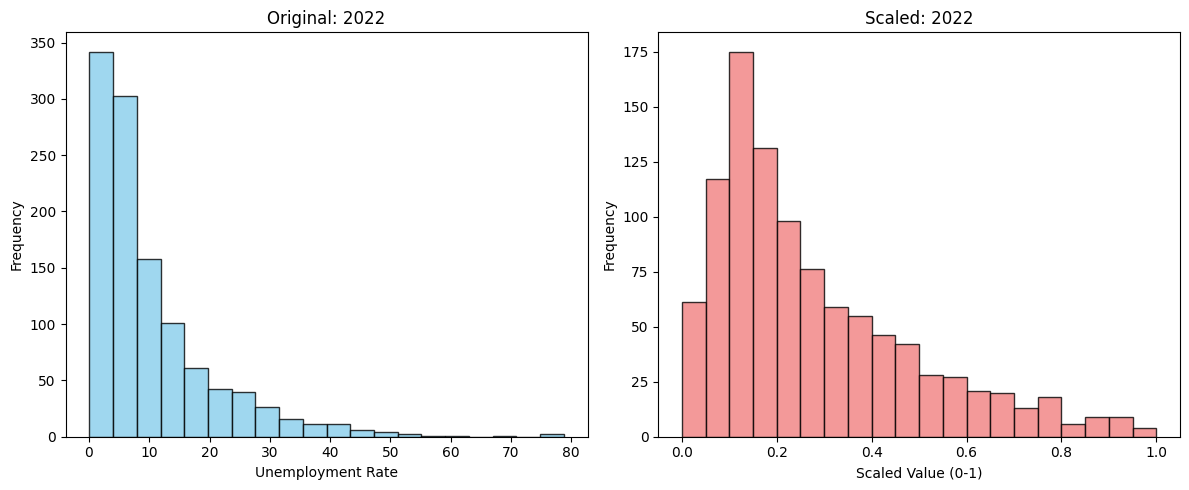


2022 Statistics:
Original → Min: 0.067, Max: 78.776, Mean: 10.340
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.278
------------------------------------------


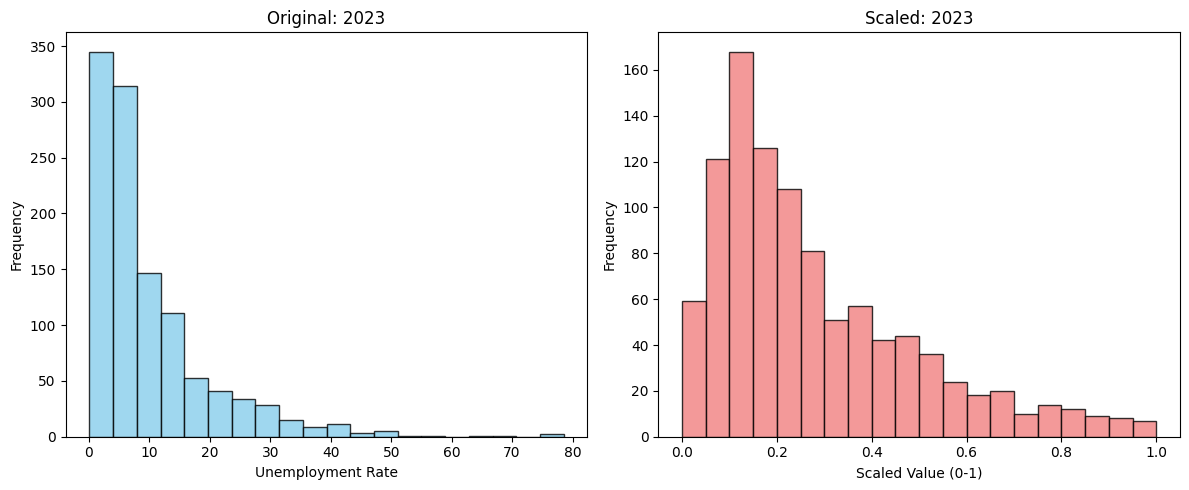


2023 Statistics:
Original → Min: 0.063, Max: 78.541, Mean: 9.985
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.280
------------------------------------------


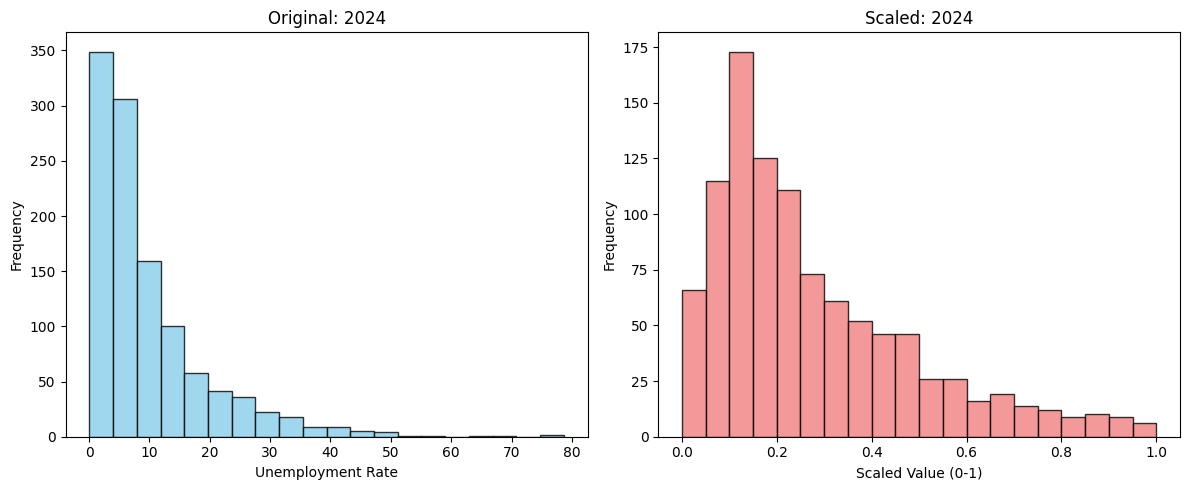


2024 Statistics:
Original → Min: 0.060, Max: 78.644, Mean: 9.940
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.277
------------------------------------------


In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
df=pt2.copy()
numerical_cols=df.select_dtypes(include=[np.number]).columns.tolist()
scaler_m=MinMaxScaler()
df_scaled=df.copy()  
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
df_scaled[numerical_cols]=scaler_m.fit_transform(df_scaled[numerical_cols])
print(f"Scaled {len(numerical_cols)} numerical columns")
for col in years:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(pt[col].dropna(), bins=20, color='skyblue', alpha=0.8, edgecolor='black')
    plt.title(f'Original: {col}')
    plt.xlabel('Unemployment Rate')
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.hist(df_scaled[col].dropna(), bins=20, color='lightcoral', alpha=0.8, edgecolor='black')
    plt.title(f'Scaled: {col}')
    plt.xlabel('Scaled Value (0-1)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print(f"\n{col} Statistics:")
    print(f"Original → Min: {pt[col].min():.3f}, Max: {pt[col].max():.3f}, Mean: {pt[col].mean():.3f}")
    print(f"Scaled   → Min: {df_scaled[col].min():.3f}, Max: {df_scaled[col].max():.3f}, Mean: {df_scaled[col].mean():.3f}")
    print("------------------------------------------")

**scaling for cleaned dataset with sampling and reduction**

Scaled 1 numerical columns


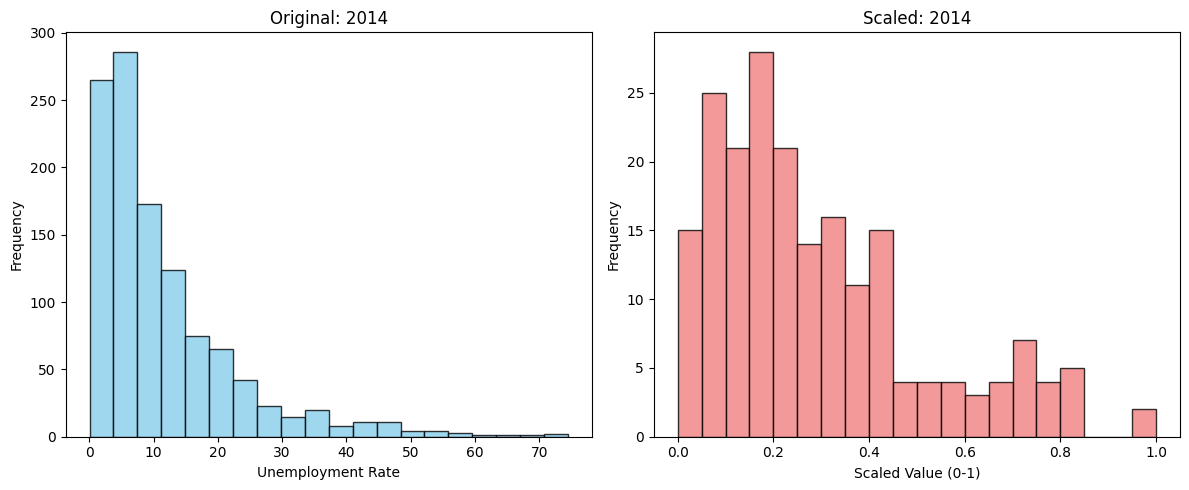


2014 Statistics:
Original → Min: 0.027, Max: 74.485, Mean: 11.388
Scaled   → Min: 0.000, Max: 1.000, Mean: 0.291
------------------------------------------


In [80]:
df=sample.copy()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler_m = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler_m.fit_transform(df_scaled[numerical_cols])
print(f"Scaled {len(numerical_cols)} numerical columns")
col='2014'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(pt[col].dropna(), bins=20, color='skyblue', alpha=0.8, edgecolor='black')
plt.title(f'Original: {col}')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(df_scaled[col].dropna(), bins=20, color='lightcoral', alpha=0.8, edgecolor='black')
plt.title(f'Scaled: {col}')
plt.xlabel('Scaled Value (0-1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print(f"\n{col} Statistics:")
print(f"Original → Min: {pt[col].min():.3f}, Max: {pt[col].max():.3f}, Mean: {pt[col].mean():.3f}")
print(f"Scaled   → Min: {df_scaled[col].min():.3f}, Max: {df_scaled[col].max():.3f}, Mean: {df_scaled[col].mean():.3f}")
print("------------------------------------------")


The left graph shows the original data where values range from about 0 to 74%-78% most countries had unemployment below 20%
The right graph shows the same data after scaling it between 0 and 1 this helps machine learning models treat all features equally and not to be baised 

**Mathematical Transformation without reduction and sampling**

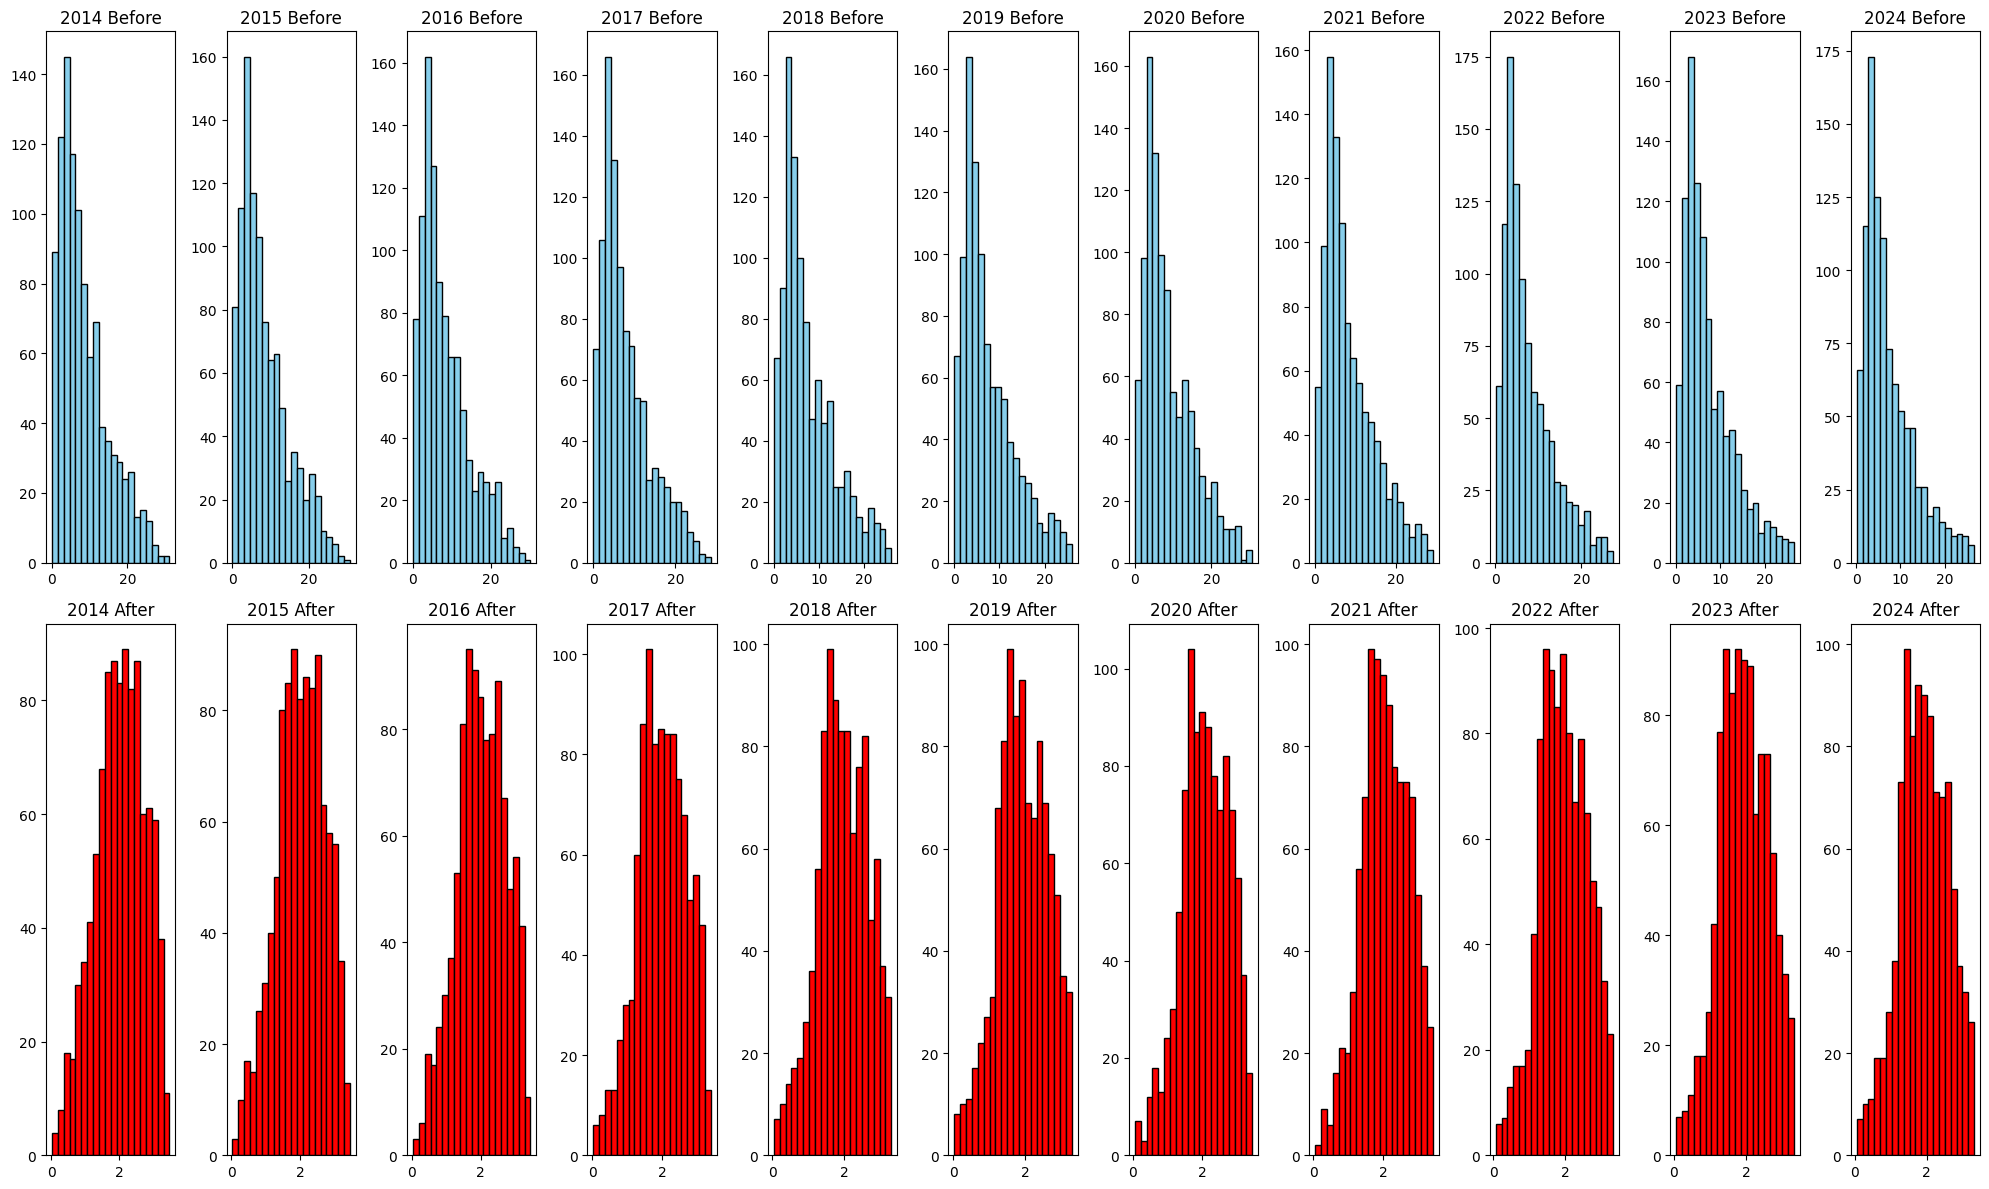

In [91]:
numeric_years=pt2[years]
pt_log=np.log1p(numeric_years)  
plt.figure(figsize=(20, 12))
for i,col in enumerate(years):
    plt.subplot(2,len(years),i+1)
    plt.hist(numeric_years[col],bins=20,color='skyblue',edgecolor='black')
    plt.title(f"{col} Before")
    plt.subplot(2,len(years),i+1+len(years))
    plt.hist(pt_log[col],bins=20,color='red',edgecolor='black')
    plt.title(f"{col} After")
plt.tight_layout()
plt.show()


**Mathematical Transformation with reduction and sampling**

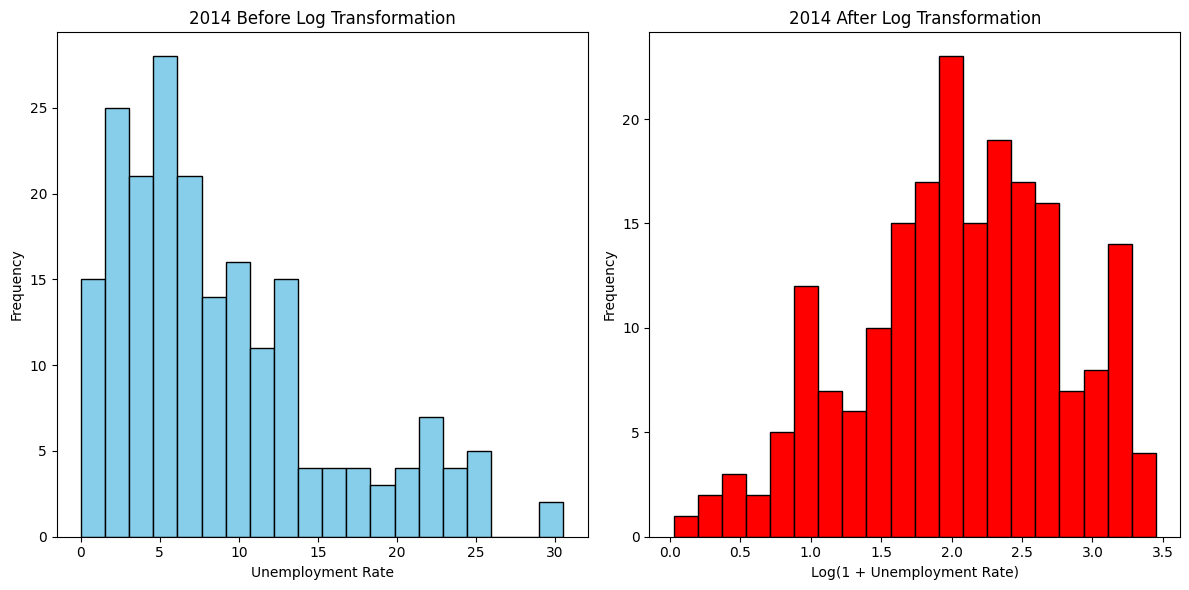


2014 Statistics:
Original → Min: 0.027, Max: 30.523, Mean: 8.894
Log Transformed → Min: 0.027, Max: 3.451, Mean: 2.049


In [93]:
col = '2014'
numeric_year_2014 = sample[[col]]
log_2014 = np.log1p(numeric_year_2014)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(numeric_year_2014[col].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f"{col} Before Log Transformation")
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(log_2014[col].dropna(), bins=20, color='red', edgecolor='black')
plt.title(f"{col} After Log Transformation")
plt.xlabel('Log(1 + Unemployment Rate)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print(f"\n{col} Statistics:")
print(f"Original → Min: {numeric_year_2014[col].min():.3f}, Max: {numeric_year_2014[col].max():.3f}, Mean: {numeric_year_2014[col].mean():.3f}")
print(f"Log Transformed → Min: {log_2014[col].min():.3f}, Max: {log_2014[col].max():.3f}, Mean: {log_2014[col].mean():.3f}")


Before the log transformation the unemployment data was uneven most values were small but some were really high which made it right-skewed
after applying the log transformation the data became more balanced and closer to a normal distribution 

**Summary of Findings**

**What issues were fixed?** 

there were missing data in 
2022               6
2023              12
2024              12 
that might have affected my EDA in MP1 but i handled it now using kNN imputation

**Outliers**:Many extreme unemployment rate values were removed(from 1134→1015 rows) this fixed unrealistic or noisy data points that could distort trends

**Noise**:The rolling average smoothing reduced random short-term spikes making the unemployment trend smoother and more meaningful

**Redundant and correlated columns**:that dataset is large so sampling helped reducing the size to process faster  
highly correlated year columns (2015–2024) I have noticed all years were similiar to each other  and the ‘age_group’ column were dropped reducing unnecessary repetition of information and preventing multicollinearity

so in the next part i used the clean data with sampling and reduction and the clean data without sampling and reduction so i can test the trends

**Inconsistency**: it really didnt help me here since im using a dataset that were cleaned from this point but im sure if i have had needed it it will helped me alot in my **anylasis** 

**How did scaling/encoding change distributions?**

I didn't do encoding but i did scaling so Im going to talk about scaling 
In the first chart (original data) we see the unemployment rate in 2014 with values going from about 0 to 74
most of the values are on the lower side and the data is clearly right-skewed 
In the second chart (after scaling) i applied Min-Max Scaling which changes the range of the data to be between 0 and 1 this helps some machine learning models work better
even though we scaled the values the shape of the distribution is still similar (still skewed to the right) but it looks a bit smoother so scaling changes the range but doesn’t completely change the overall pattern of the data it just made it closer to be normal

**Were there tradeo s or limitations?**


when I tried to reduce the dataset using correlation it removed all the unemployment rate columns across the years so, I had to keep at least one year to be able to analyze the data as a result, we lost a lot of information the dataset became smaller and faster to process but this came at the cost of losing valuable yearly trends
so in the next part i used the clean data with sampling and reduction and the clean data without sampling and reduction so i can test the trends

In my dataset unemployment rates had a wide range ( for example :from 0.03% to over 70%) applying Min-Max scaling made all values fall between 0 and 1 which helps ensure that no single year’s data dominates during analysis or modeling  
after scaling the values lost their original percentage meaning for example instead of saying "unemployment is 11%", it just shows something like 0.27 — which makes it harder to interpret the results directly in real-world terms
